<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAD2 lab 10**

Adapted from [Navarro, Danielle.](https://orcid.org/0000-0001-7648-6578) 2023. “The Metropolis-Hastings Algorithm.” April 12, 2023. https://blog.djnavarro.net/posts/2023-04-12_metropolis-hastings/. (*Licensed under [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)*)

# Problem formulation

The **Metropolis-Hastings** algorithm is perhaps the most popular example of a **Markov chain Monte Carlo (MCMC)** method in statistics. The basic problem that it solves is to provide a method for sampling from some arbitrary probability distribution $\mathbb{P}(X=x)$ with probability density function denoted as $f(x)$. The idea is that in many cases, you know how to write out the equation for the probability , but you don't know how to generate a random number from this distribution, . This is the situation where MCMC is handy. For example, suppose we've become interested for reasons known but to the gods in the probability distribution shown below:

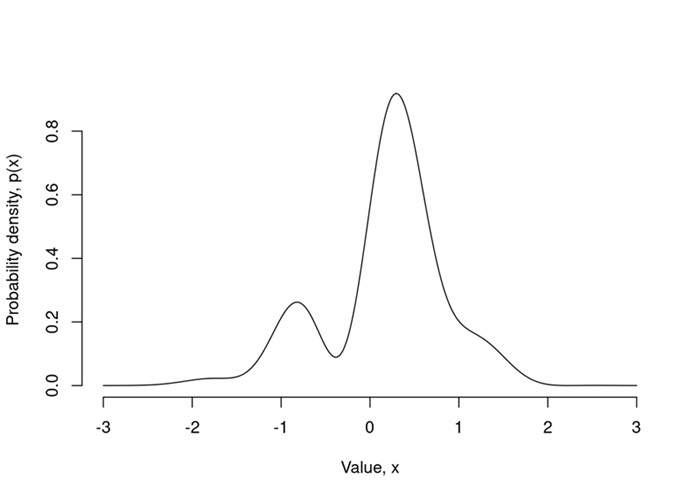




The probability density function $f(x)$ for this distribution is given by the following equation:

$$f(x) =  \frac{\exp(-x^2)\Bigl(2 +\sin(5x) + (\sin(2x)\Bigl)}{\int_{-∞}^{∞}\exp(-u^2)\Bigl(2 +\sin(5u) + (\sin(2u)\Bigl) \mathrm{d} u}$$

The problem might occur if we don't know how to solve the integral in the denominator analytically or in case of high-dimentional distributions brute force numerical methods to compute integral might not work ([Curse of dimentionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

So this means in truth, we only know the distribution "up to some unknown constant". That is, all we really know how to calculate is the numerator. Given this, a more realistic way to express our knowledge about the target distribution is captured by this equation:

$$f(x) \propto \exp(-x^2)\Bigl(2 +\sin(5x) + (\sin(2x)\Bigl)$$

But how can I generate samples from this distribution?

# The Metropolis-Hastings algorithm

The basic idea behind MCMC is very simple: define a [Markov chain](https://en.wikipedia.org/wiki/Markov_chain) over possible $x$ values, in such a way that the **stationary distribution** of the Markov chain is in fact searched probability density function $f(x)$. We will use a Markov chain to generate a sequence of $x$ values, denoted $(x_0, x_1, \dots, x_n)$, in such a way that as $n \to \infty$, it is guaranteed that $x(n) \sim f(x)$. There are multiple different ways of setting up a Markov chain having this property. One of them is **Metropolis-Hastings algorithm**.

## The proposal step

First let's remeber that $\{X_0, X_1, \dots, X_n\}$ is a sequence of random variables in a Markov chain and $x_0, x_1, \dots, x_n$ is an observed sequence of states of respective random variables.

Now, suppose that the current state of the Markov chain is $x_n$. We want to generate the next state in the chain $x_{n+1}$. In the Metropolis-Hastings algorithm, the generation of $x_{n+1}$ is a two-stage process.

The first stage is to generate a **candidate**, which we'll denote $x^*$. The value of $x^*$ is generated from the **proposal distribution** we can sample from. We denote this proposal distribution $q(x^*|x_n)$. Notice that the distribution we sample from depends on the current state of the Markov chain, $x_n$. There are some technical constraints on what you can use as a proposal distribution, but for the most part it can be anything you like, however, the sampler won't work if there are some values $x$ that never get proposed. The standard way to do this is to use a normal distribution centered on the current state $x_n$. More formally, we write this as:

$$x^* | x_n \sim \text{Normal}(x_n, \sigma^2) $$

for some standard deviation $\sigma$ that we select in advance (more on this later!)


## The accept-reject step

The second stage is the accept-reject step. Firstly, we calculate the **acceptance probability**, denoted $A(x_n \to x^*)$, which is given by:

$$A(x_n \to x^*) = \min\Bigl(1, \frac{f(x^*)}{f(x_n)} \times \frac{q(x_n | x^*)}{q(x^*|x_n)}\Bigl).$$

First, let's notice that the ratio $\frac{f(x^*)}{f(x^n)}$ does not depend on the normalising constant for the distribution, which is the integral we usually can't easily compute (not in our case). We have

$$\frac{f(x^*)}{f(x^n)} = \frac{\exp(-x^{*2})(2 +\sin(5x^*) + (\sin(2x^*))}{\exp(-x_n^2)(2 +\sin(5x_n) + (\sin(2x_n))}$$

We can compute above equality without the need for numerical integration or solving intergral analytically.

Another thing worth noting is the behaviour of term, $\frac{q(x_n | x^*)}{q(x^*|x_n)}$.
What this term does is correct for any biases that the proposal distribution might induce. In this expression, the denominator $q(x^*|x_n)$ describes the probability with which we would choose $x^*$ as the candidate if the current state of the Markov chain is $x_n$. The numerator, however, describes the probability of a transition that goes the other way: that is, if the current state had actually been $x^*$, what is the probability that you would have generated $x_n$ as the candidate value? If the proposal distribution is *symmetric*, which normal distribution is, then these two probabilities will turn out to be equal. So for normal distribution we will have:

$$\begin{align*}q(x^*|x_n) &= \frac{1}{\sqrt{2\pi \sigma^2}}\exp\Bigl(\frac{1}{2\sigma^2}(x_n - x^*)^2\Bigl),\\
q(x_n|x^*) &= \frac{1}{\sqrt{2\pi \sigma^2}}\exp\Bigl(\frac{1}{2\sigma^2}(x^* - x_n)^2\Bigl).
\end{align*}$$

Clearly, $q(x^*|x_n) = q(x_n|x^*)$
for all choices of $x_n$ and $x^*$, and as a consequence

$$\frac{q(x_n | x^*)}{q(x^*|x_n)} = 1.$$

This special case of the Metropolis-Hastings algorithm, in which the proposal distribution is symmetric, is referred to as the **Metropolis algorithm**.

Having proposed the candidate $x^*$
and calculated the acceptance probability, $A(x_n \to x^*)$, we now either decide to "accept" the candidate and set $x_{n+1} = x^*$ or we "reject" the candidate and set $x_{n+1} = x_n$. To make this decision, we generate a uniformly distributed random number between $0$ and $1$, denoted $u$. We can write this criterion as:

$$x_{n+1} = \begin{cases}x^* \quad \text{if } u \leq A(x_n \to x^*) \\
x_n \quad \text{otherwise}.\end{cases}$$

It is important to note that this is just simple example of Metropolis-Hastings algorithm (Metropolis algorithm to be specific) and there are quite a few technical issues that need to be explored to actually use the algorithm in real world setting, so further reading is necessary. This example is suppose to show some intuition about how the MCMC works.

# Implementing the sampler


### Exercise 1: Implementation

Let's implement Metropolis-Hastings algorithm by writing function that draws samples from previously defined distribution. First define the sampler in terms of three functions:

1. `target`- calculates the probability of a given sample $x$ (more precisely: the numerator term in the equation describing the probability density),

2. `metropolis_step` - takes some value $x$ corresponding to the current state of the Markov chain and a parameter `sigma` that describes the standard deviation of the proposal distribution,

3. `metropolis_sampler` - runs the Metropolis algorithm for `n` number of steps and has following parameters

  *  `initial_value` - start point for MC,
  * `n` - number of samples drawn from target distribution,
  * `sigma` - standard deviation of normal distribution used for proposing candidate values at each step,
  * `burnin` - *burn in period* - number if iterations of sampler run before recording results
  * `lag` - number of iterations run between recording succesive samples.

Functions in 2 and 3 should return dictionary with `value` recording the numeric value that vas sampled and `accepted` logical variable indicating whether this value arose from accepting the proposal (rather than rejecting it).

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def target(x):
    #############################################
    res = torch.exp(-x**2) * (2 + torch.sin(5*x) + torch.sin(2*x))
    ##############################################
    return res

def metropolis_step(x, sigma):

    ##############################################
    # Propose a new value for x from a normal distribution
    x_star = x + torch.normal(0.0, sigma, size=x.shape)

    # Calculate the acceptance probability
    alpha = torch.min(torch.tensor(1.0), target(x_star) / target(x))

    # Draw a random uniform number
    u = torch.rand(1)

    # Decide whether to accept the proposed x
    if u <= alpha:
        value = x_star
        accepted = True
    else:
        value = x
        accepted = False
    #############################################

    # Return the result as a dictionary
    out = {'value': value, 'accepted': accepted}

    return out

In [4]:
def metropolis_sampler(initial_value, n=1000, sigma=1, burnin=0, lag=0):
    results = []
    current_state = initial_value

    # Burn-in phase
    for _ in range(burnin):
      #######################################################
      # TODO
      out = metropolis_step(current_state, sigma)
      current_state = out['value']
      #####################################################

    # Sampling phase
    for _ in range(n):
        for _ in range(1+lag):
          ###################################################
          # TODO
          out = metropolis_step(current_state, sigma)
          current_state = out['value']
          ###################################################
        results.append(out)

    # Convert results into a torch tensor for the final output
    values = torch.tensor([r['value'].item() for r in results])
    accepted = torch.tensor([r['accepted'] for r in results])

    # Return the results in a dictionary
    return {'values': values, 'accepted': accepted}

Now, let's run `metropolis_sampler`.

In [6]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Run the sampler with initial_value = 0
out = metropolis_sampler(initial_value=torch.tensor(0.0))

# Print the first 100 values (both value and accepted status)
for i in range(100):
    print(f"Value: {out['values'][i].item()}, Accepted: {out['accepted'][i].item()}")

Value: 0.0461304634809494, Accepted: True
Value: 0.448533296585083, Accepted: True
Value: 0.448533296585083, Accepted: False
Value: 0.448533296585083, Accepted: False
Value: 0.6795001029968262, Accepted: True
Value: 0.6795001029968262, Accepted: False
Value: 0.6795001029968262, Accepted: False
Value: 0.6795001029968262, Accepted: False
Value: 0.5245996713638306, Accepted: True
Value: -0.8459892272949219, Accepted: True
Value: -0.8459892272949219, Accepted: False
Value: -0.08417421579360962, Accepted: True
Value: -0.09401653707027435, Accepted: True
Value: -1.5413569211959839, Accepted: True
Value: -2.02034068107605, Accepted: True
Value: -1.1664420366287231, Accepted: True
Value: -0.9742397665977478, Accepted: True
Value: -0.8824175596237183, Accepted: True
Value: -0.8824175596237183, Accepted: False
Value: 0.9858952760696411, Accepted: True
Value: 0.9858952760696411, Accepted: False
Value: 0.8475761413574219, Accepted: True
Value: 0.03285479545593262, Accepted: True
Value: 0.388735264

## The effect of proposal width


When implementing a Metropolis algorithm, the choice of proposal distribution is crutial. If it's too narrow, the sampler will have an extremely high acceptance rate on average, but it will move around extremely slowly. To use the technical term, it has a very low *mixing rate*. This distorts our estimate of the target distribution. However, if the proposal distribution is too wide, the acceptance rate becomes too low and the chain gets stuck on specific values for long periods of time. This also distorts the estimate of the target distribution.

Yes, technically, if we run our accursed sampler long enough despite the poor choice of proposal distribution it will eventually produce the right answer. Nevertheless, we would prefer a sampler that gives the right answer quickly rather than slowly.

### Exercise 2: Effect of proposal with

1. Run Metropolis sampler with `n = 10000` on our problem three times, each with different `sigma` value: `1, 0.025, 50`.

2. Plot histogram of sample values.

3. Plot the Markov chain itself: sample values at each time-step. It's ususally reffered to as *trace plot*.

3. Interpret the insights we can gather about proposal distribution from the plots.

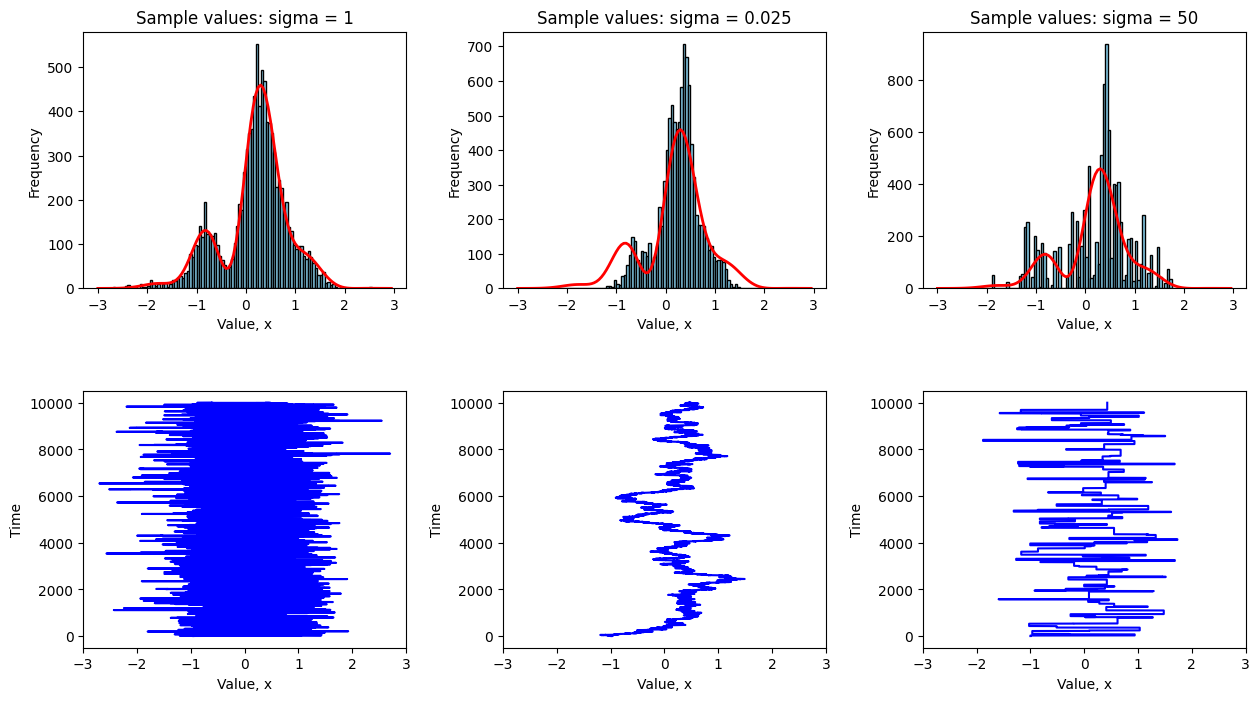

In [10]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Parameters
######################################################################
sigma = [1, 0.025, 50]
n = 10000
######################################################################

# Generate plots for each sigma
for i in range(3):
    # Run the Metropolis sampler
    out = metropolis_sampler(initial_value=torch.tensor(-1.0), n=n, sigma=sigma[i])

    # Extract values
    values = out['values'].numpy()

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-3, 3, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_title(f"Sample values: sigma = {sigma[i]}")
    ax_hist.set_xlabel("Value, x")
    ax_hist.set_ylabel("Frequency")

    ######################################################################
    # Overlay expected distribution
    x = np.arange(-3, 3, 0.05)
    p = target(torch.tensor(x)).numpy()  # Calculate target distribution
    expected = n*p/p.sum()  # Expected values based on target distribution
    ax_hist.plot(x, expected, color='red', linewidth=2)
    ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-3, 3])
    ax_plot.set_xlabel("Value, x")
    ax_plot.set_ylabel("Time")

# Display the plots
plt.show()

**Notes for tutors**: The way to read these plots is as follows: for all three values of `sigma`, we have two plots. The top one shows a histogram of the samples values obtained using the Metropolis sampler (that's the black bars). Superimposed on this is a red line showing the distribution of values you'd expect to obtain when sampling from the true distribution. The lower panel plots the Markov chain itself: the sequence of generated values.9

In the leftmost plots, we see what happens when we choose a good proposal distribution: the chain shown in the lower panel moves rapidly across the whole distribution, without getting stuck in any one place. In the far right panel, we see what happens when the proposal distribution is too wide: the chain gets stuck in one spot for long periods of time. It does manage to make big jumps, covering the whole range, but because the acceptance rate is so low that the distribution of samples is highly irregular. Finally, in the middle panel, if we set the proposal distribution to be too narrow, the acceptance rate is very high so the chain doesn't get stuck in any one spot, but it doesn't cover a very wide range. This simple example should give you an intuition for why you need to “play around” with the choice of proposal distribution. A good proposal distribution can make a huge difference!

## The role of burn-in period

Up to this point we haven't really explained what the `burnin` and `lag` parameters are there for. We won't go into details but present only basic idea. First, let's think about the *burn-in* issue.

### Exercise 3: Burn-in period

Suppose we started the sampler at a very bad location… say `initial_value = -3`, and - just so that we can exaggerate the problem - we'll use a proposal distribution that is too narrow, say `sigma = .1`.

1. Run sampler three times with `n=1000`, `initial_value = -3` and `sigma = .1` and plot each of the runs similarily as the in the Exercise 2.

2. Interpret the results. How does the Markov chain behave, after what step the behaviour changes? Add line to the plot where you see the difference in behaviour.

3. What happends in the beggining of the run? What is the impact of the "bad" start location? What is location of the histograms with respect to original distribution.

Now let's try to fix the issues observed in the previous points. To do this we will let the algorithm run for a while before starting to collect actual samples. The length of time that you spend doing this is called the **burn in period**.

4. Set the parameter `burnin` to the value found in the point 2. Run the algorithm.

5. Interpret the results. What happened? Did the results improve? What other problems you can observe? What might be reason (hint: think obaout other parameters)?

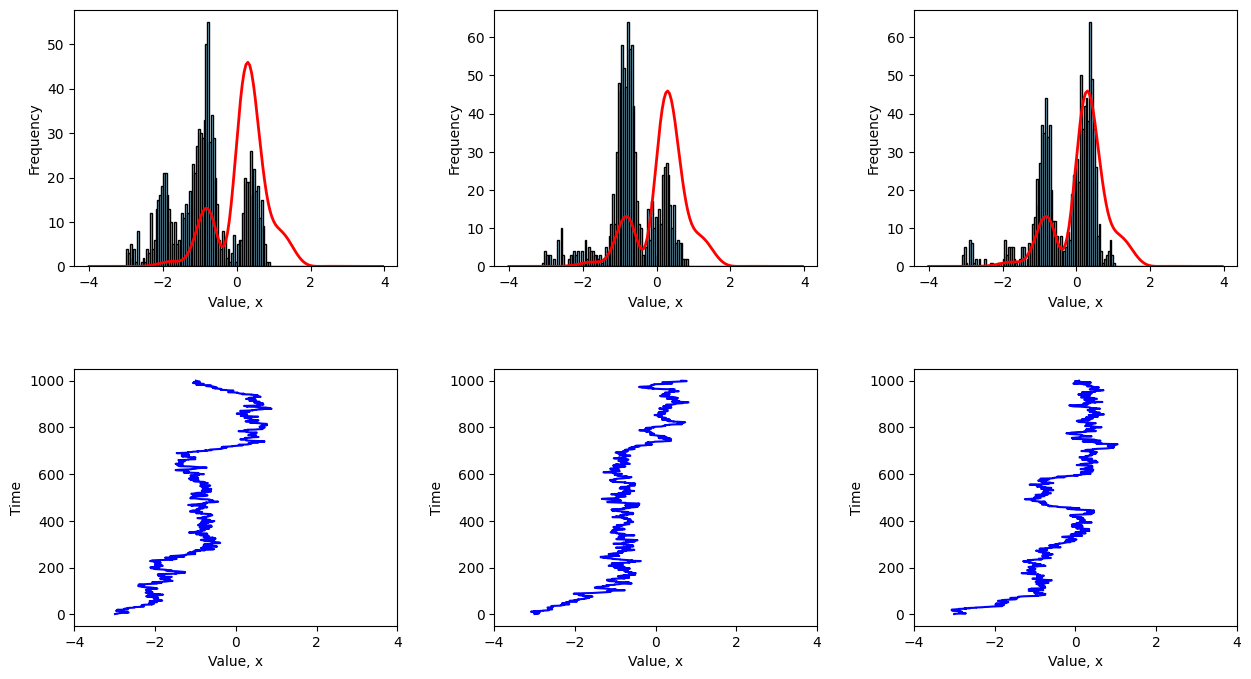

In [11]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

######################################################################
# Parameters
n = 1000
######################################################################

# Generate plots
for i in range(3):
    ######################################################################
    # Run the Metropolis sampler
    out = metropolis_sampler(initial_value=torch.tensor(-3.0), n=n, sigma=0.1)

    # Extract values
    values = out['values'].numpy()
    ######################################################################

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-4, 4, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_xlabel("Value, x")
    ax_hist.set_ylabel("Frequency")

    ######################################################################
    # Overlay expected distribution
    x = np.arange(-4, 4, 0.05)
    p = target(torch.tensor(x)).numpy()  # Calculate target distribution
    expected = n*p/p.sum()  # Expected values based on target distribution
    ax_hist.plot(x, expected, color='red', linewidth=2)
    ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-4, 4])
    ax_plot.set_xlabel("Value, x")
    ax_plot.set_ylabel("Time")

    # Add horizontal dotted line at y=200
    ######################################################################
    # TODO
    ######################################################################

# Display the plots
plt.show()


**Notes for tutors**: As you can see, the sampler spends the first 200 or so iterations slowly moving rightwards towards the main body of the distribution. Once it gets there, the samples start to look okay, but notice that the histograms are biased towards the left (i.e., towards the bad start location).

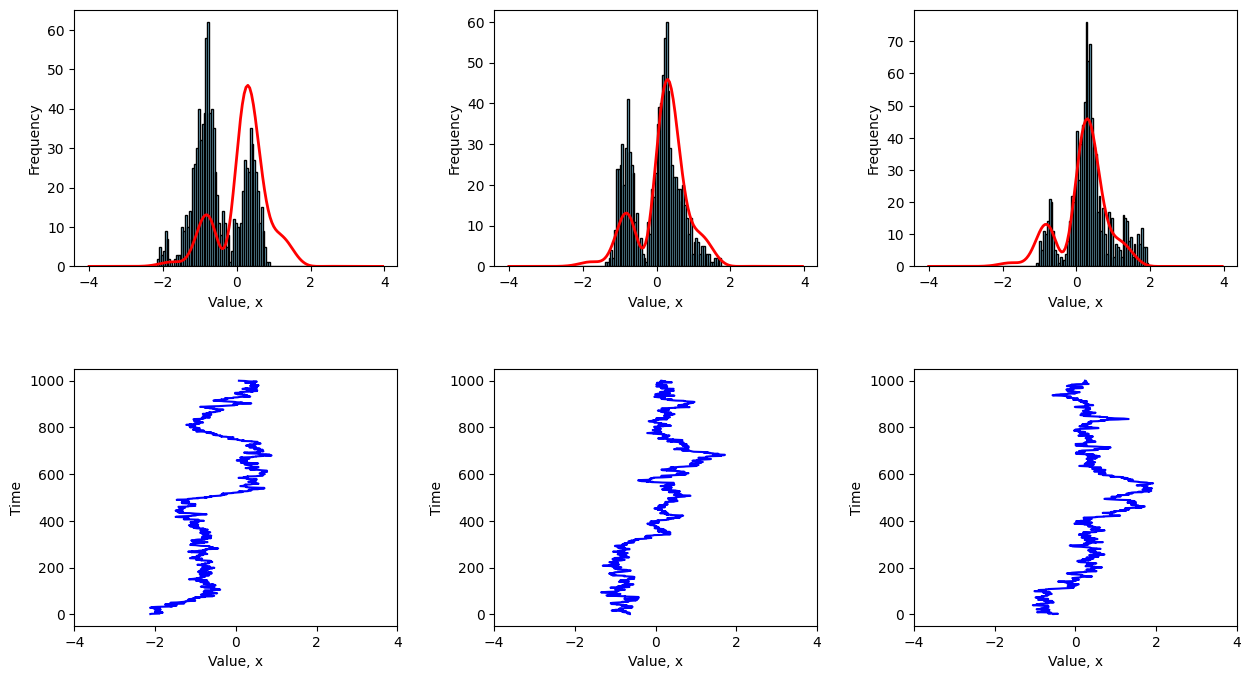

In [13]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

######################################################################
# Parameters
n = 1000
######################################################################

# Generate plots
for i in range(3):
    # Run the Metropolis sampler with burnin
    out = metropolis_sampler(initial_value=torch.tensor(-3.0), burnin=200, n=n, sigma=0.1)

    # Extract values
    values = out['values'].numpy()

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-4, 4, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_xlabel("Value, x")
    ax_hist.set_ylabel("Frequency")

    ######################################################################
    # Overlay expected distribution
    x = np.arange(-4, 4, 0.05)
    p = target(torch.tensor(x)).numpy()  # Calculate target distribution
    expected = n*p/p.sum()  # Expected values based on target distribution
    ax_hist.plot(x, expected, color='red', linewidth=2)
    ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-4, 4])
    ax_plot.set_xlabel("Value, x")
    ax_plot.set_ylabel("Time")

# Display the plots
plt.show()


**Note for tutors**: It's still not ideal - largely because we don't have many samples, we haven't set a lag, and the value of sigma isn't very well chosen - but you can see that the bias caused by the poor choice of starting value has disappeared.

## The role of lag parameter

Finally, we'll mention in passing the role played by the `lag` parameter, which is used in so-called *thinning phase*. In some situations we can be forced into using a proposal distribution that has a very low acceptance rate. When that happens, we're left with an awkward Markov chain that gets stuck in one location for long periods of time. One thing that people often do in that situation is allow several iterations of the sampler to elapse in between successive samples. This is the `lag` between samples.

### Exercise 4: Thinning phase

Illustrate the effect of the thinning phase for the sampler with a very wide proposal distribution (`sigma = 50`).

1. Run sampler three times with `n = 1000` samples drawn, `sigma = 50`, and different `lag` values: `0, 10, 100`.

2. Interpret the results. What is the link between [autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) of the succesive samples and lag? Do we want our samples to be independent, why or why not?

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

######################################################################
# Parameters
n = 1000
lag_values = [0, 10, 100]
######################################################################

# Generate plots for different lags
for i in range(3):
    ######################################################################
    # Run the Metropolis sampler with specified lag
    out = ...

    # Extract values
    values = out['values'].numpy()
    ######################################################################

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-4, 4, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_title(f"Lag: {lag_values[i]}")
    ax_hist.set_xlabel("Value, x")
    ax_hist.set_ylabel("Frequency")

    ######################################################################
    # Overlay expected distribution
    x = np.arange(-3, 3, 0.05)
    p = ...  # Calculate target distribution
    expected = ...  # Expected values based on target distribution
    ax_hist.plot(x, expected, color='red', linewidth=2)
    ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-4, 4])
    ax_plot.set_xlabel("Value, x")
    ax_plot.set_ylabel("Time")

# Display the plots
plt.show()


**Note for tutors**: Formally speaking, the thing we're trying to do by increasing `lag` is reduce the [autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) between successive samples in our chain. In an ideal world we want our sampled values to be independent samples from the target distribution $f(x)$. The more our samples are correlated with each other, the more potential there is for the histogram of sampled values to depart systematically from the target distribution. Introducing a lag between successive samples is a simple way to achieve this.

## Reminder

The discussion is heavily oversimplified. It doesn't discuss the conditions required to make Metropolis sampling work, it doesn't talk about diagnostics, and it certainly doesn't talk about what happens when we move this into higher dimensional problems.

# Another example - sampling from posterior distribution

*Maria Bochenek*

## Model setup

Suppose we have observation $X \mid \theta \sim \mathcal{N}(\theta, 1)$ with Cauchy prior on the mean, $\theta \sim \text{Cauchy}(0,1)$.

We would like to perform update our beliefs about $\theta$ based on the information provided by data $X$ - obtain posterior distribution of $\theta$ given $X$.

The likelihood is

$$
L(x \mid \theta) = \frac{1}{\sqrt{2\pi}} \exp\left[ -\frac{1}{2} (x - \theta)^2\right],
$$

and the prior follows [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution) with location parameter equal $0$ and scale parameter equal $1$ and can be expressed as

$$
f(\theta; 0, 1) = \frac{1}{\pi(1 + \theta^2)}.
$$

The posterior distribution is proportional to the likelihood times prior, that is

$$
f(\theta \mid x) \propto \exp\left[-\frac{1}{2}(x - \theta)^2\right] \frac{1}{1 + \theta^2},
$$

with the normalizing constant (probability of producing the data) being the reciprocal of

$$
Z(x) = \int_{-\infty}^{\infty}  \exp\left[-\frac{1}{2}(x - \theta)^2\right]  \frac{1}{1 + \theta^2} \mathrm{d} \theta.
$$

In practice this normalizing constant is treated as intractable and not evaluated analytically. Instead Monte Carlo methods such as Metropolis Hastings algorithm are used to generate samples from such distribution and perform Bayesian inference.

Now, suppose we have observed data $X = (x_1, \dots, x_n)$, then the posterior probability will be proportional to

$$
f(\theta \mid X) \propto  \frac{1}{1 + \theta^2} \prod_{i=1}^n \exp\left[-\frac{1}{2}(x_i - \theta)^2\right]
$$

As usual let's work with log-probabilities. We have

$$
\log f(\theta \mid X) \propto - \log\left(1 + \theta^2\right) -\frac{1}{2} \sum_{i=1}^n (x_i - \theta)^2.
$$


### Exercise 5

Perform Metropolis-Hastings algorithm on the example above.

1. Use logarithm of the numerator of posterior distribution as the target distribution (note that it is proportional to posterior). Fill in the gaps in `log_target` function.

1. Adapt the code for `metropolis_step` function, so that it

In [ ]:
# Simulate some data - normally this would be empirically collected

torch.manual_seed(1234)
theta_true = 1.5
n = 100
X = torch.normal(theta_true, 1, size=(n,))

In [ ]:
def log_target(theta, data):
    ##############################################
    res = ...
    ##############################################
    return res

def metropolis_step(theta, data, sigma):

    ##############################################
    # Propose a new value for theta from a normal distribution - random walk

    # Calculate the acceptance probability

    # Draw a random uniform number

    # Decide whether to accept the proposed theta

    #############################################

    # Return the result as a dictionary
    out = {'value': value, 'accepted': accepted}

    return out

In [ ]:
def metropolis_sampler(initial_value, data, n=1000, sigma=1, burnin=0, lag=0):
    results = []
    current_state = initial_value

    # Burn-in phase
    for _ in range(burnin):
      #######################################################
      # TODO
      #####################################################

    # Sampling phase
    for _ in range(n):
        for _ in range(1+lag):
          ###################################################
          # TODO
          ###################################################
        results.append(out)

    # Convert results into a torch tensor for the final output
    values = torch.tensor([r['value'].item() for r in results])
    accepted = torch.tensor([r['accepted'] for r in results])

    # Return the results in a dictionary
    return {'values': values, 'accepted': accepted}

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Run the sampler with initial_value = 0
out = metropolis_sampler(initial_value=torch.tensor(0.0), x=X)

# Print the first 10 values (both value and accepted status)
for i in range(10):
    print(f"Value: {out['values'][i].item()}, Accepted: {out['accepted'][i].item()}")

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Parameters
######################################################################
sigma = [0.001, 1.0, 100]
n = 10000
######################################################################

# Generate plots for each sigma
for i in range(3):
    # Run the Metropolis sampler
    out = metropolis_sampler(initial_value=torch.tensor(0.0),
                             x=X,
                             n=n,
                             sigma=sigma[i],
                             burnin=200,
                            #  lag=10,
                             )

    # Extract values
    values = out['values'].numpy()

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-1, 3, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_title(f"Sample values: sigma = {sigma[i]}")
    ax_hist.set_xlabel(r"Value, $\theta$")
    ax_hist.set_ylabel("Frequency")

    # ######################################################################
    # Overlay expected distribution
    thetas = np.arange(-1, 3, 0.05)
    p = torch.tensor([torch.exp(target(torch.tensor(y), X)) for y in thetas]) # Calculate target distribution
    expected = n * p / p.sum()  # Expected values based on target distribution
    ax_hist.plot(thetas, expected, color='red', linewidth=2)
    # ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-1, 3])
    ax_plot.set_xlabel(r"Value, $\theta$")
    ax_plot.set_ylabel("Time")

# Display the plots
plt.show()

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(1234)

# Adjust plot layout settings
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Parameters
######################################################################
sigma = 1.0
n = 10000
lag_values = [0, 10, 100]
######################################################################

# Generate plots for each sigma
for i in range(3):
    # Run the Metropolis sampler
    out = metropolis_sampler(initial_value=torch.tensor(0.0),
                             x=X,
                             n=n,
                             sigma=sigma,
                             burnin=200,
                             lag=lag_values[i],
                             )

    # Extract values
    values = out['values'].numpy()

    # Histogram
    ax_hist = axes[0, i]
    ax_hist.hist(values, bins=np.arange(-1, 3, 0.05), color='skyblue', edgecolor='black')
    ax_hist.set_title(f"Lag = {lag_values[i]}")
    ax_hist.set_xlabel(r"Value, $\theta$")
    ax_hist.set_ylabel("Frequency")

    # ######################################################################
    # Overlay expected distribution
    thetas = np.arange(-1, 3, 0.05)
    p = torch.tensor([torch.exp(target(torch.tensor(y), X)) for y in thetas]) # Calculate target distribution
    expected = n * p / p.sum()  # Expected values based on target distribution
    ax_hist.plot(thetas, expected, color='red', linewidth=2)
    # ######################################################################

    # Time-series plot
    ax_plot = axes[1, i]
    ax_plot.plot(values, np.arange(1, n + 1), color='blue')
    ax_plot.set_xlim([-1, 3])
    ax_plot.set_xlabel(r"Value, $\theta$")
    ax_plot.set_ylabel("Time")

# Display the plots
plt.show()